# ELEC5305 Research Project
## Speaker Gender Recognition Using Deep Learning

### Import Libraries

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd  
import os
import shutil

### Data Path Specification

In [ ]:
## Create a folder that will sort the audio data in gender
Data_path = './AudioData'
female_path = os.path.join(Data_path, 'female')
male_path = os.path.join(Data_path, 'male')
if not os.path.exists(Data_path):
    os.makedirs(Data_path)
    os.mkdir(female_path)
    os.mkdir(male_path)


In [ ]:

# Splitting the folder corresponds to the Gender Index
# Dataset and Description: https://zenodo.org/records/1188976#.XYP8CSgzaUk 
'''Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).'''

RAV = './audio_speech_actors_01-24/' # RAVDESS directory
dir_list = os.listdir(RAV)
print(dir_list)
for folder in dir_list:
    current_path = os.path.join(RAV, folder)
    print(current_path)
    actor = int(folder.split('_')[1]) # Actor index
    if actor%2 == 0:
        # Female
        # female if actor index is even number
        
        for file in os.listdir(current_path):
            shutil.copy2(os.path.join(current_path, file), female_path)
    else:
        # Male
        # male if actor index is odd number
        for file in os.listdir(current_path):
            shutil.copy(os.path.join(current_path, file), male_path)

In [ ]:
female_num = len(os.listdir(female_path))
male_num = len(os.listdir(male_path))
print(female_num)
print(male_num)


### Visualize Audio Data

#### Male Visualization

22050


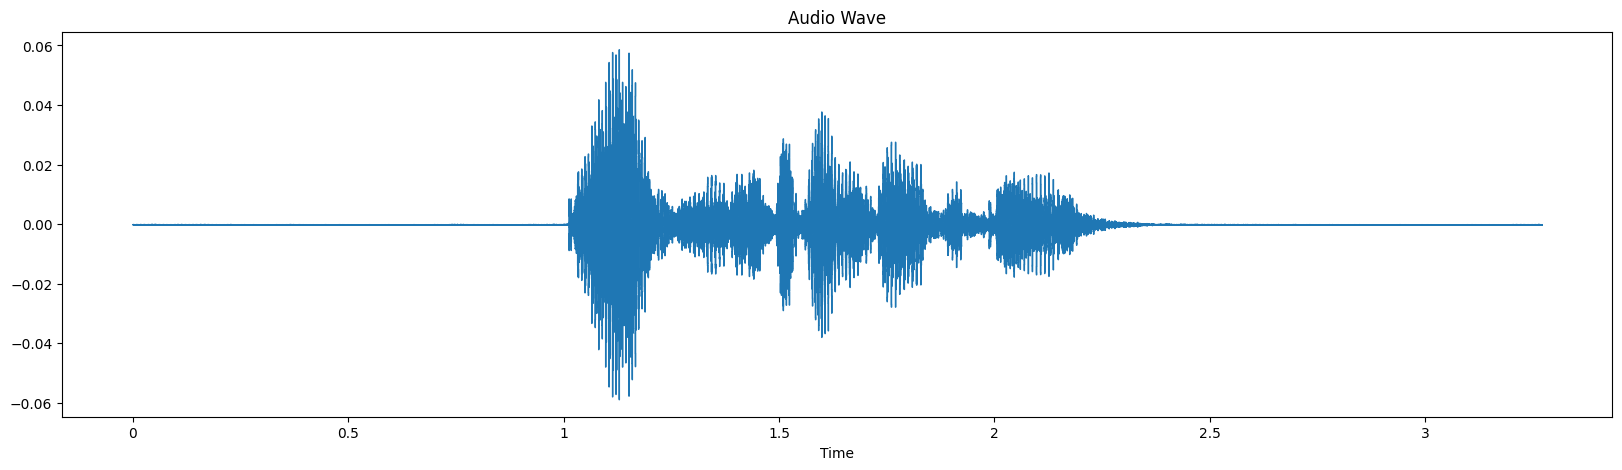

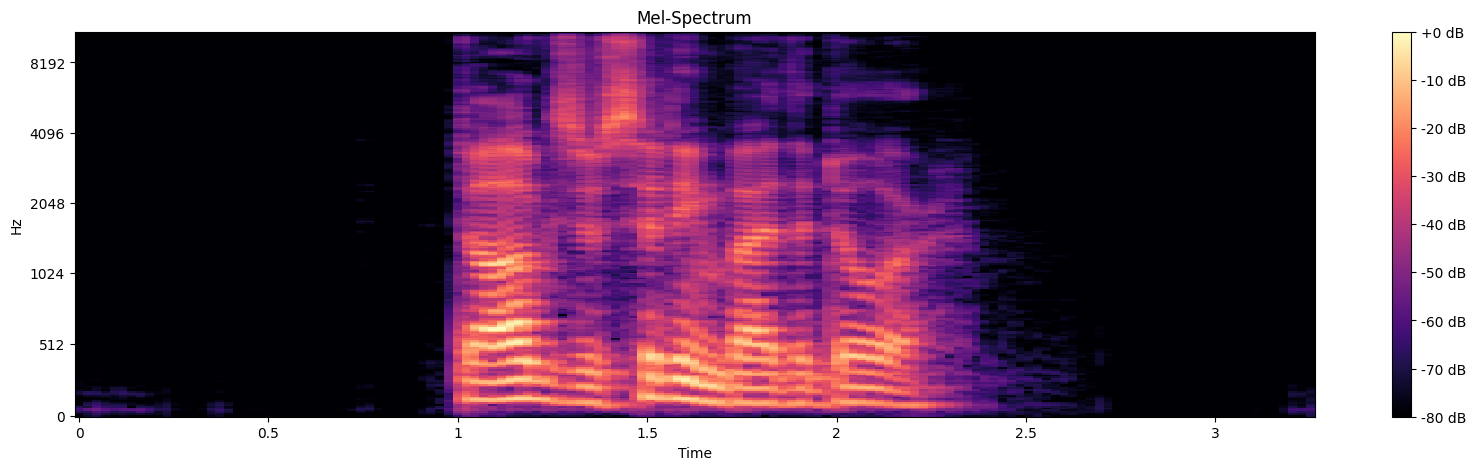

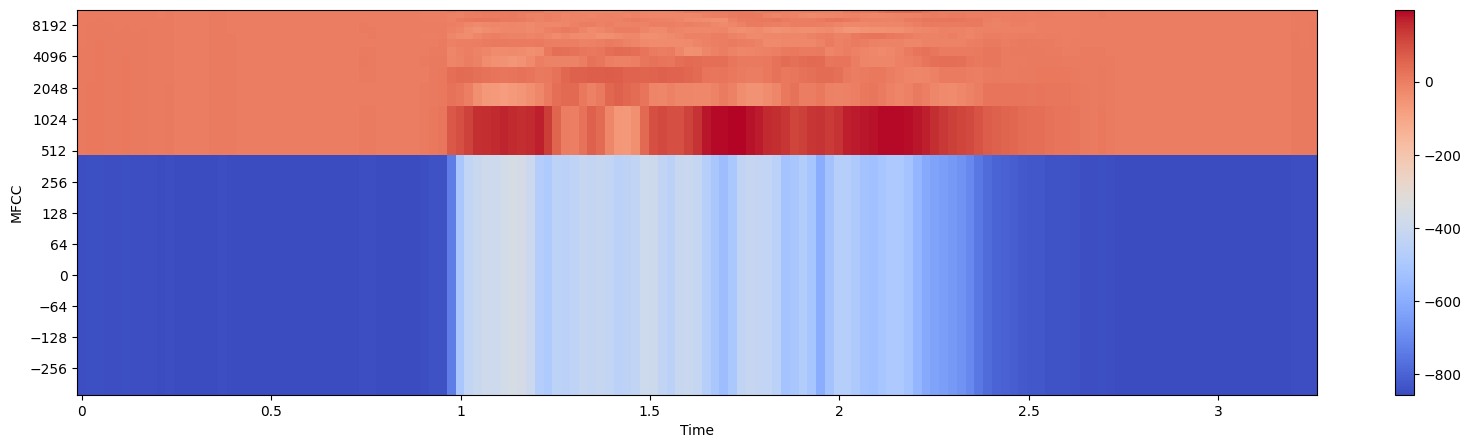

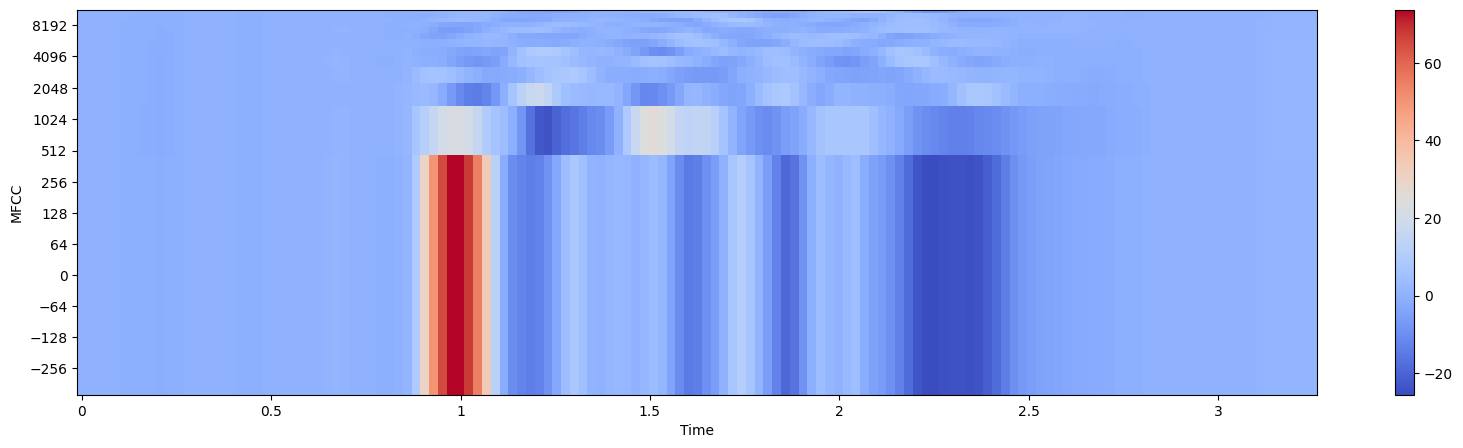

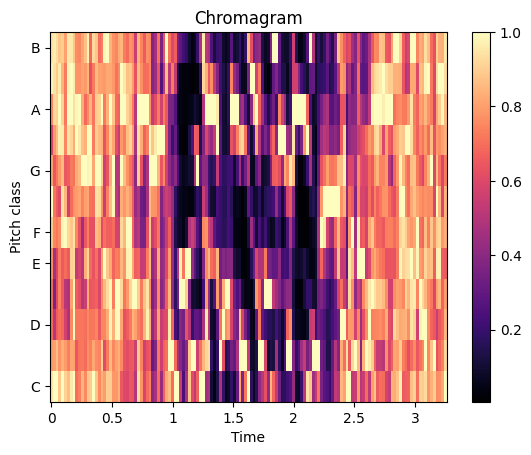

In [22]:
# Male Audio Visualization
audio = './AudioData/male/03-01-01-01-02-01-01.wav'
wav, sr = librosa.load(audio)
print(sr)

# Audio wave
plt.figure(figsize=(20, 5))
librosa.display.waveshow(wav, sr=sr)
plt.title('Audio Wave')

# Mel-Spectrum (dB scale)
plt.figure(figsize = (20, 5))
M = librosa.feature.melspectrogram(y=wav, sr=sr, n_mels=256, fmax=sr/2, n_fft=2048)
M_db = librosa.power_to_db(M, ref=np.max)
librosa.display.specshow(M_db, y_axis='mel', x_axis='time', fmax=sr/2)
plt.title("Mel-Spectrum")
plt.colorbar(format="%+2.f dB")

# MFCC (log scale)
mfcc = librosa.feature.mfcc(y = wav, sr = sr, n_mfcc = 13)
plt.figure(figsize=(20, 5))
librosa.display.specshow(mfcc, x_axis='time',y_axis='log')
plt.ylabel('MFCC')
plt.colorbar()
# Delta MFCC
delta_mfcc = librosa.feature.delta(mfcc)
plt.figure(figsize=(20, 5))
librosa.display.specshow(delta_mfcc, x_axis='time',y_axis='log')
plt.ylabel('MFCC')
plt.colorbar()

# Chroma Spectralgram
chroma1 = librosa.feature.chroma_stft(y=wav, sr=sr, n_fft=2048, 
                                     hop_length=512, win_length=2048, window='hann')
plt.figure()
librosa.display.specshow(chroma1, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')


ipd.Audio(audio)


#### Femal Visualization

22050


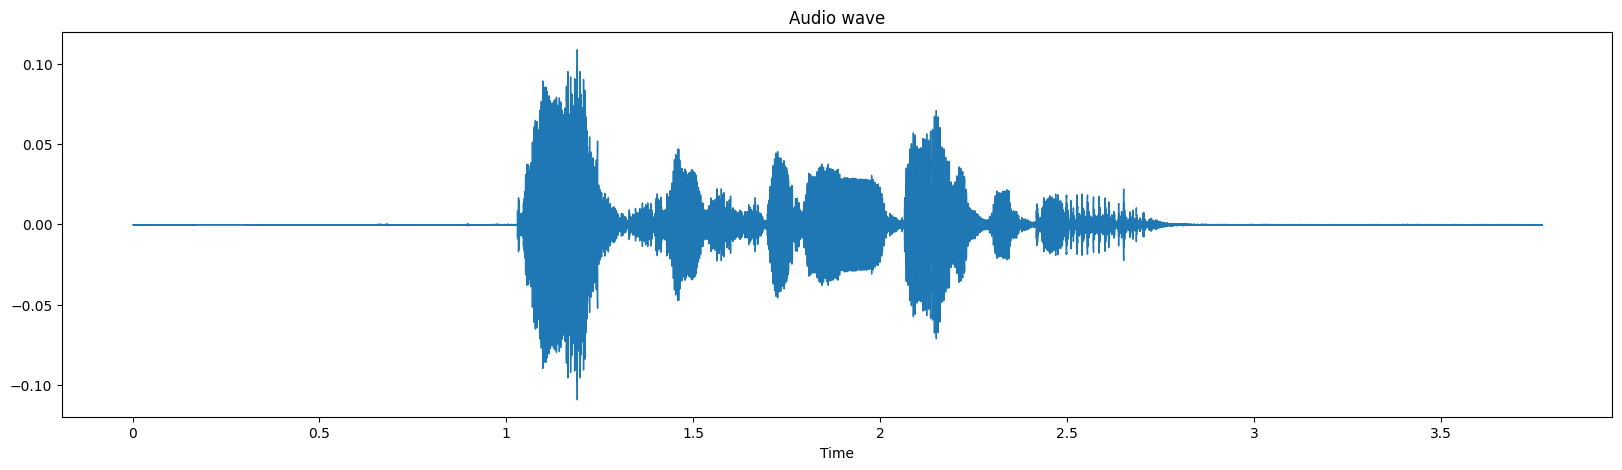

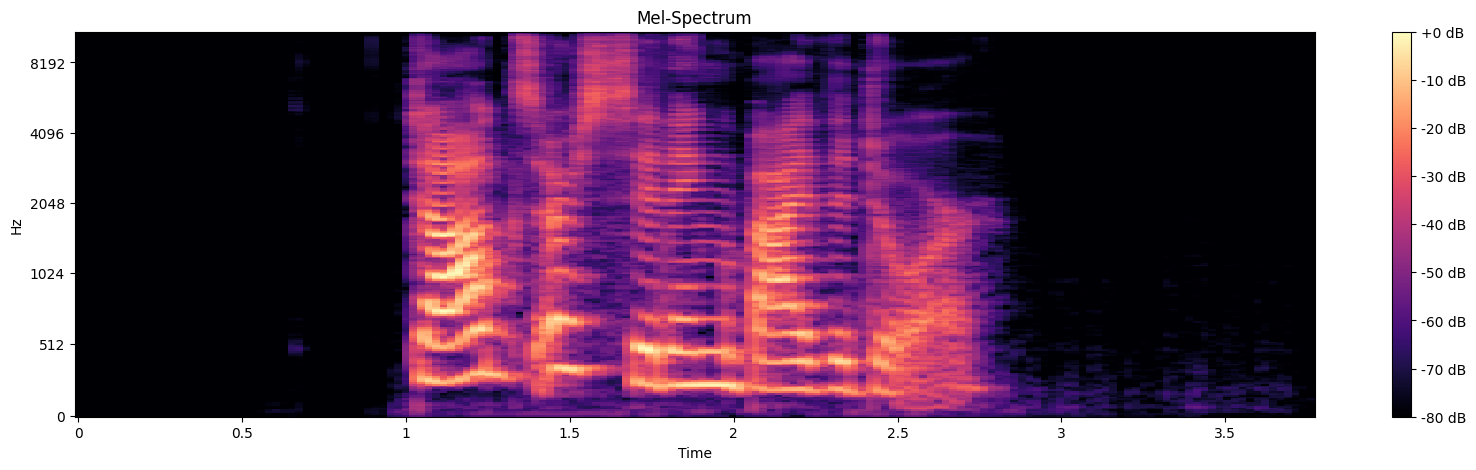

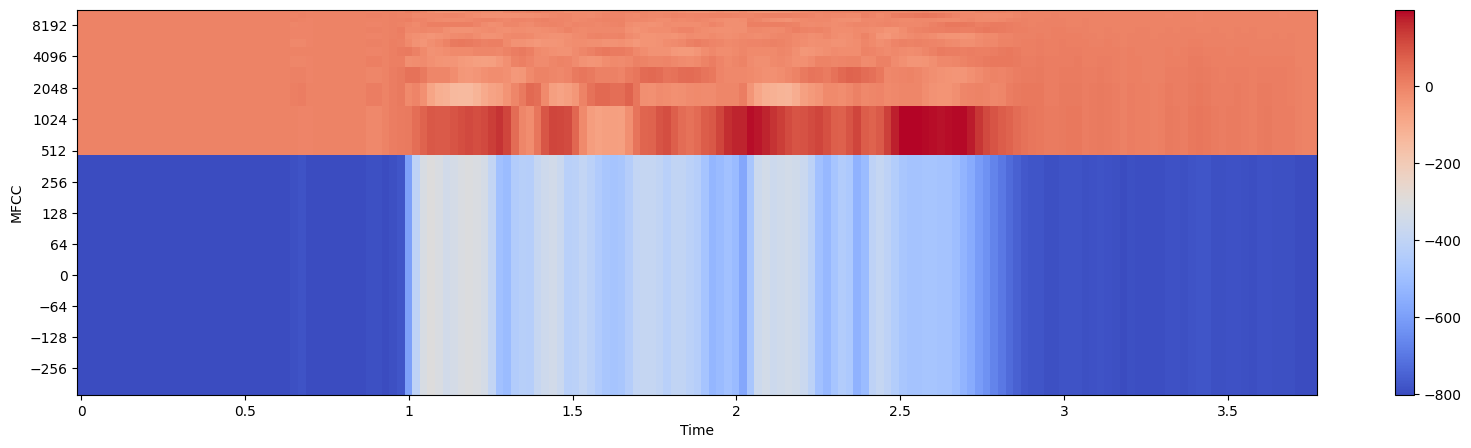

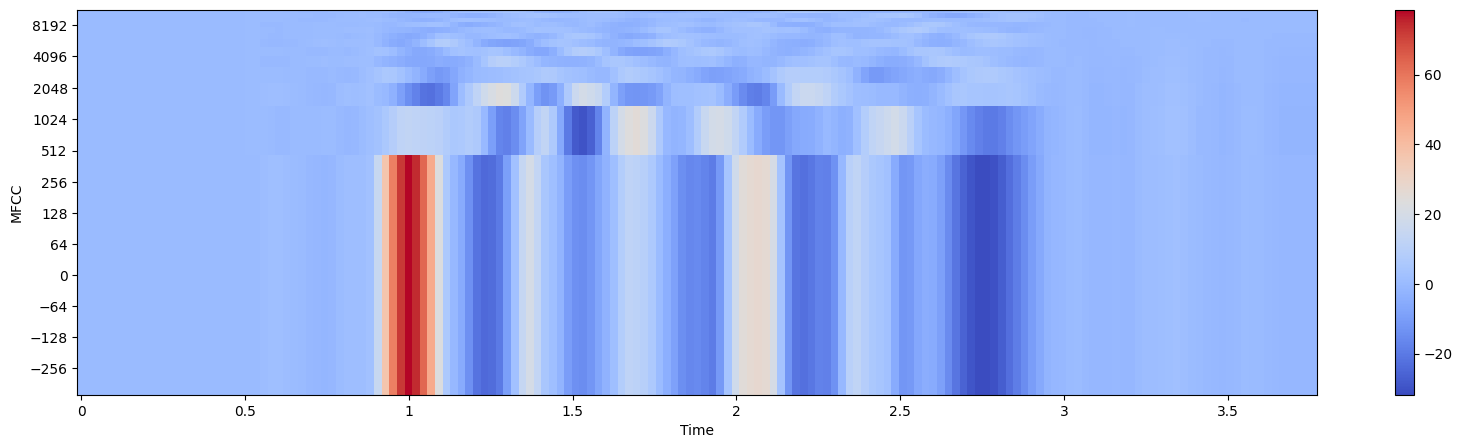

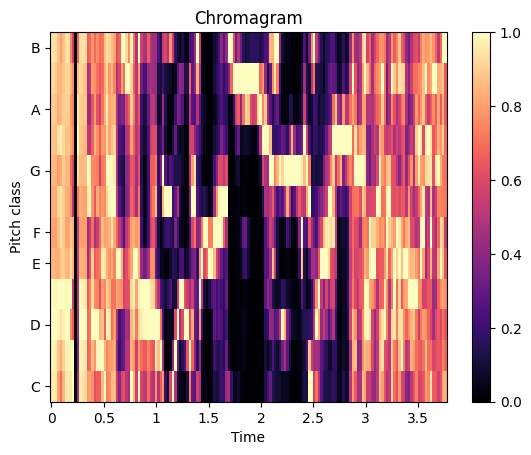

In [18]:
# Female Audio Visualization
audio = './AudioData/female/03-01-01-01-02-01-02.wav'
wav, sr = librosa.load(audio)
print(sr)
# Audio wave
plt.figure(figsize=(20, 5))
librosa.display.waveshow(wav, sr=sr)
plt.title('Audio wave')

# Mel-Spectrum (dB scale)
plt.figure(figsize = (20, 5))
M = librosa.feature.melspectrogram(y=wav, sr=sr, n_mels=256, fmax=sr/2, n_fft=2048)
M_db = librosa.power_to_db(M, ref=np.max)
librosa.display.specshow(M_db, y_axis='mel', x_axis='time', fmax=sr/2)
plt.title("Mel-Spectrum")
plt.colorbar(format="%+2.f dB")

# MFCC (log scale)
mfcc = librosa.feature.mfcc(y = wav, sr = sr, n_mfcc = 13)
plt.figure(figsize=(20, 5))
librosa.display.specshow(mfcc, x_axis='time',y_axis='log')
plt.ylabel('MFCC')
plt.colorbar()
# Delta MFCC
delta_mfcc = librosa.feature.delta(mfcc)
plt.figure(figsize=(20, 5))
librosa.display.specshow(delta_mfcc, x_axis='time',y_axis='log')
plt.ylabel('MFCC')
plt.colorbar()

# Chroma Spectralgram
chroma = librosa.feature.chroma_stft(y=wav, sr=sr, n_fft=2048, 
                                     hop_length=512, win_length=2048, window='hann')
plt.figure()
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')

ipd.Audio(audio)


### Generate MFCC Image Dataset

In [ ]:
# import splitfolders 
# Convert audio files to MFCC RGB images
input_directory = './AudioData'
output_directory = './MFCCs'

for folders in os.listdir(input_directory):
    tmp_dir = os.path.join(input_directory,folders) 
    os.makedirs(os.path.join(output_directory,folders), exist_ok=True)
    for files in os.listdir(os.path.join(input_directory, folders)):
        audio = os.path.join(tmp_dir, files)
        # print(files)
        # Generate MFCC
        wav, sr = librosa.load(audio)
        plt.figure(figsize=(2.24, 2.24), frameon=False)    # 64 * 64 RGB Images, 224*224 for resnet
        mfcc = librosa.feature.mfcc(y = wav, sr = sr, n_mfcc = 13)
        librosa.display.specshow(mfcc, x_axis='time',y_axis='log')
        # Don't Change! Saving files in .png format with original file name
        plt.axis('off')
        plt.autoscale(tight=True)
        figure_name = files.split('.')[0]   # derive the file name
        figure_name = figure_name + '.png'
        print(figure_name)
        plt.savefig(os.path.join(output_directory, folders, figure_name))
        plt.close()
    print('-'*55)
## Split the dataset into train and val
# splitfolders.ratio('./MFCCs', output="MFCCs", seed=1337, ratio=(0.8, 0.2))

#### Edge Detection Testing

(Text(0.5, 1.0, 'Edge Image'), ([], []), ([], []))

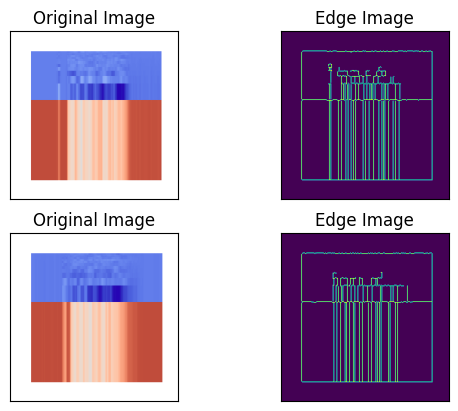

In [8]:
# Applying Canny Filter for Edge Detection
import cv2
plt.close('all')

img = cv2.imread('./MFCCs/female/03-01-01-01-01-02-02.png')
t_lower = 50  # Lower Threshold 
t_upper = 150  # Upper threshold 
# Applying the Canny Edge filter 
edges = cv2.Canny(img, t_lower, t_upper) 
plt.subplot(2,2,1)
plt.imshow(img)
plt.title('Original Image'), 
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,2)
plt.imshow(edges)
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

img = cv2.imread('./MFCCs/male/03-01-01-01-01-02-01.png')
t_lower = 50  # Lower Threshold 
t_upper = 150  # Upper threshold 
# Applying the Canny Edge filter 
edges = cv2.Canny(img, t_lower, t_upper) 
plt.subplot(2,2,3)
plt.imshow(img)
plt.title('Original Image'), 
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,4)
plt.imshow(edges)
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])


### Generate Mel-Spectrogram Image Data Set 

In [ ]:
# Convert audio files to Mel-spectrogram RGB images
import splitfolders 
input_directory = './AudioData'
output_directory = './Mel'

for folders in os.listdir(input_directory):
    tmp_dir = os.path.join(input_directory,folders) 
    os.makedirs(os.path.join(output_directory,folders), exist_ok=True)
    for files in os.listdir(os.path.join(input_directory, folders)):
        audio = os.path.join(tmp_dir, files)
        # Generate MelSpec
        wav, sr = librosa.load(audio)
        plt.figure(figsize=(2.24, 2.24), frameon=False)    # 64 * 64 RGB Images, 224*224 for resnet
        M = librosa.feature.melspectrogram(y=wav, sr=sr, n_mels=256, fmax=sr/2, n_fft=2048)
        M_db = librosa.power_to_db(M, ref=np.max)
        librosa.display.specshow(M_db, y_axis='mel', x_axis='time', fmax=sr/2)
        # Don't Change! 
        # Saving files in .png format with original file name
        plt.axis('off')
        plt.autoscale(tight=True)
        figure_name = files.split('.')[0]   # derive the file name
        figure_name = figure_name + '.png'
        print(figure_name)
        plt.savefig(os.path.join(output_directory, folders, figure_name))
        plt.close()
    print('-'*55)
# splitfolders.ratio('./Mel', output="Mel", seed=1337, ratio=(0.8, 0.2))


#### Edge Detection Testing

(Text(0.5, 1.0, 'Edge Image'), ([], []), ([], []))

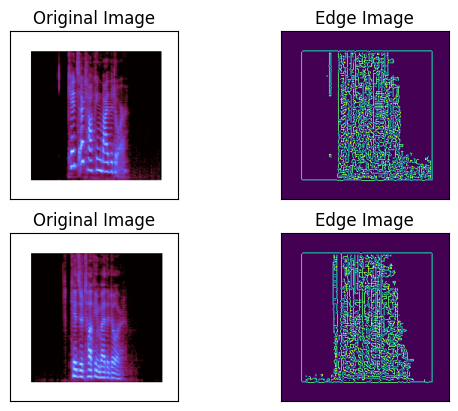

In [7]:
import cv2
plt.close('all')

img = cv2.imread('./Mel/female/03-01-01-01-01-02-02.png')
t_lower = 100  # Lower Threshold 
t_upper = 200  # Upper threshold 
# Applying the Canny Edge filter 
edges = cv2.Canny(img, t_lower, t_upper) 
plt.subplot(2,2,1)
plt.imshow(img)
plt.title('Original Image'), 
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,2)
plt.imshow(edges)
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

img = cv2.imread('./Mel/male/03-01-01-01-01-02-01.png')
# Applying the Canny Edge filter 
edges = cv2.Canny(img, t_lower, t_upper) 
plt.subplot(2,2,3)
plt.imshow(img)
plt.title('Original Image'), 
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,4)
plt.imshow(edges)
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

### Generate Chromagram Image Dataset

In [9]:
import splitfolders 
input_directory = './AudioData'
output_directory = './Chroma'

for folders in os.listdir(input_directory):
    tmp_dir = os.path.join(input_directory,folders) 
    os.makedirs(os.path.join(output_directory,folders), exist_ok=True)
    for files in os.listdir(os.path.join(input_directory, folders)):
        audio = os.path.join(tmp_dir, files)
        # Generate Chromagrams
        wav, sr = librosa.load(audio)
        plt.figure(figsize=(2.24, 2.24), frameon=False)    # 64 * 64 RGB Images, 224*224 for resnet
        chroma = librosa.feature.chroma_stft(y=wav, sr=sr, n_fft=2048, hop_length=512, 
                                             win_length=2048, window='hann')
        librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
        # Don't Change! 
        # Saving files in .png format with original file name
        plt.axis('off')
        plt.autoscale(tight=True)
        figure_name = files.split('.')[0]   # derive the file name
        figure_name = figure_name + '.png'
        print(figure_name)
        plt.savefig(os.path.join(output_directory, folders, figure_name))
        plt.close()
    print('-'*55)
splitfolders.ratio('./Chroma', output="Chroma", seed=1337, ratio=(0.8, 0.2))

03-01-01-01-01-01-02.png
03-01-01-01-01-01-04.png
03-01-01-01-01-01-06.png
03-01-01-01-01-01-08.png
03-01-01-01-01-01-10.png
03-01-01-01-01-01-12.png
03-01-01-01-01-01-14.png
03-01-01-01-01-01-16.png
03-01-01-01-01-01-18.png
03-01-01-01-01-01-20.png
03-01-01-01-01-01-22.png
03-01-01-01-01-01-24.png
03-01-01-01-01-02-02.png
03-01-01-01-01-02-04.png
03-01-01-01-01-02-06.png
03-01-01-01-01-02-08.png
03-01-01-01-01-02-10.png
03-01-01-01-01-02-12.png
03-01-01-01-01-02-14.png
03-01-01-01-01-02-16.png
03-01-01-01-01-02-18.png
03-01-01-01-01-02-20.png
03-01-01-01-01-02-22.png
03-01-01-01-01-02-24.png
03-01-01-01-02-01-02.png
03-01-01-01-02-01-04.png
03-01-01-01-02-01-06.png
03-01-01-01-02-01-08.png
03-01-01-01-02-01-10.png
03-01-01-01-02-01-12.png
03-01-01-01-02-01-14.png
03-01-01-01-02-01-16.png
03-01-01-01-02-01-18.png
03-01-01-01-02-01-20.png
03-01-01-01-02-01-22.png
03-01-01-01-02-01-24.png
03-01-01-01-02-02-02.png
03-01-01-01-02-02-04.png
03-01-01-01-02-02-06.png
03-01-01-01-02-02-08.png


Copying files: 1440 files [00:03, 363.10 files/s]


(Text(0.5, 1.0, 'Edge Image'), ([], []), ([], []))

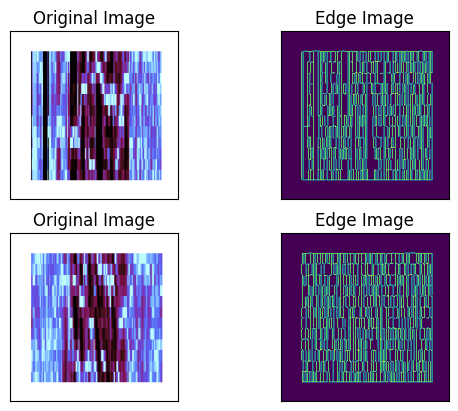

In [26]:
import cv2
plt.close('all')

img = cv2.imread('./Chroma/female/03-01-01-01-01-02-02.png')
t_lower = 100  # Lower Threshold 
t_upper = 200  # Upper threshold 
# Applying the Canny Edge filter 
edges = cv2.Canny(img, t_lower, t_upper) 
plt.subplot(2,2,1)
plt.imshow(img)
plt.title('Original Image'), 
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,2)
plt.imshow(edges)
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

img = cv2.imread('./Chroma/male/03-01-01-01-01-02-01.png')
# Applying the Canny Edge filter 
edges = cv2.Canny(img, t_lower, t_upper) 
plt.subplot(2,2,3)
plt.imshow(img)
plt.title('Original Image'), 
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,4)
plt.imshow(edges)
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
